# Klasifikátory a analýza pohybu

Několik typů klasifikátorů:

* Nejbližší soused (KNN)
* Bayessův klasifikátor 
* Support Vector Machine (SVM)

Dva základní typy učení:

* S učitelem (Supervised learning)
* Bez učitele (Unsupervised learning)
    

## Klasifikátory v Pythonu

Dobrým pomocníkem je balík [scikits-learn (sklearn)](http://scikit-learn.org/dev/user_guide.html).

In [7]:
%pylab inline --no-import-all
from sklearn import datasets
import numpy as np
import sklearn.model_selection

Populating the interactive namespace from numpy and matplotlib


## Kosatec

Načtení trénovacích dat. Jde o kosatec (iris flower) a jeho tři poddruhy: Iris setosa, 
Iris versicolor, Iris virginica. Měří se délka kalichu, šířka kalichu, délka okvětního lístku a šířka okvětního lístku.

![iris](http://scipy-lectures.github.io/_images/Virginia_Iris.png)

In [8]:
iris = datasets.load_iris()
# cílové třídy
print np.unique(iris.target)
# rozměry dat
print iris.data.shape

print iris.data[-10:,:]

# print iris.target

[0 1 2]
(150, 4)
[[ 6.7  3.1  5.6  2.4]
 [ 6.9  3.1  5.1  2.3]
 [ 5.8  2.7  5.1  1.9]
 [ 6.8  3.2  5.9  2.3]
 [ 6.7  3.3  5.7  2.5]
 [ 6.7  3.   5.2  2.3]
 [ 6.3  2.5  5.   1.9]
 [ 6.5  3.   5.2  2. ]
 [ 6.2  3.4  5.4  2.3]
 [ 5.9  3.   5.1  1.8]]


## Klasifikátor podle K-nejbližšího souseda

Nejbližší soused
![NN](http://www.kky.zcu.cz/uploads/courses/zdo/lesson8/5.jpg)

K - nejbližší soused
![KNN](http://www.kky.zcu.cz/uploads/courses/zdo/lesson8/6.jpg)

Počítání minimální vzdálenosti
![minimální vzdálenost](http://www.kky.zcu.cz/uploads/courses/zdo/lesson8/7.jpg)


In [3]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
knn.fit(iris.data, iris.target) 
#KNeighborsClassifier(...)
predikce = knn.predict([[0.1, 0.2, 0.3, 0.4]])
print predikce
#array([0])

[0]


![knn_classif](http://scipy-lectures.github.io/_images/iris_knn.png)

## Trénovací a testovací sada

Při experimentování je důležité rozdělit data na trénovací a testovací sadu. 

In [4]:
perm = np.random.permutation(iris.target.size)
iris.data = iris.data[perm]
iris.target = iris.target[perm]

train_data = iris.data[:100]
train_target = iris.target[:100]

test_data = iris.data[100:]
test_target = iris.target[100:]

knn.fit(train_data, train_target) 

knn.score(test_data, test_target) 

/usr/lib/pymodules/python2.7/sklearn/neighbors/base.py:23: UserWarning: kneighbors: neighbor k+1 and neighbor k have the same distance: results will be dependent on data order.
  warnings.warn(msg)


0.97999999999999998

## Bayessův klasifikátor

$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{ (x_i - \mu_y)^2}{2\pi\sigma^2_y}\right)$$

In [5]:
import sklearn.naive_bayes
gnb = sklearn.naive_bayes.GaussianNB()
gnb.fit(train_data, train_target)
y_pred = gnb.predict(test_data)
print("Number of mislabeled points : %d" % (test_target != y_pred).sum())

Number of mislabeled points : 2


## SVM klasifikátor

Rozděluje data nadrovinou

![svm](http://scipy-lectures.github.io/_images/svm_margin.png)

In [6]:
from sklearn import svm
svc = svm.SVC()
svc.fit(train_data, train_target) 
y_pred = svc.predict(test_data)
print("Number of mislabeled points : %d" % (test_target != y_pred).sum())

Number of mislabeled points : 0


/usr/lib/pymodules/python2.7/sklearn/svm/classes.py:184: FutureWarning: SVM: scale_C will be True by default in scikit-learn 0.11
  cache_size, scale_C)


## Učení bez učitele

Cílem je rodělit obrazy bez další informace do skupin - shluků

Vstup
![bez ucitele vstup](http://www.kky.zcu.cz/uploads/courses/zdo/lesson8/2.jpg)

výstup
![kmeans výstup](http://www.kky.zcu.cz/uploads/courses/zdo/lesson8/3.jpg)

Pro jednoduché případy lze použít algoritmus K-Means. Pro složitější natrénování Bayessova klasifikátoru je využíván EM-algoritmus.

## Titanic
![iris](http://cdn.history.com/sites/2/2014/01/titanic-P.jpeg)

### VARIABLE DESCRIPTIONS

[Description](http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf)

* [Pclass] Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* [survival] Survival (0 = No; 1 = Yes)
* name Name
* sex Sex
* age Age
* sibsp Number of Siblings/Spouses Aboard
* parch Number of Parents/Children Aboard
* ticket Ticket Number
* fare Passenger Fare (British pound)
* cabin Cabin
* embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
* boat Lifeboat
* body Body Identification Number
* home.dest Home/Destination

### SPECIAL NOTES

* Pclass is a proxy for socio-economic status (SES)
  1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

* Age is in Years; Fractional if Age less than One (1)
  If the Age is estimated, it is in the form xx.5

* Fare is in Pre-1970 British Pounds ()
  Conversion Factors: 1 = 12s = 240d and 1s = 20d
  
[Kaggle - Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)

In [55]:
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### Analýza obsahu

In [62]:
titanic["psex"] = titanic["sex"] == "male"

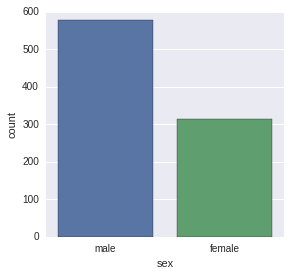

In [83]:
sns.factorplot(x="sex", kind="count", data=titanic)

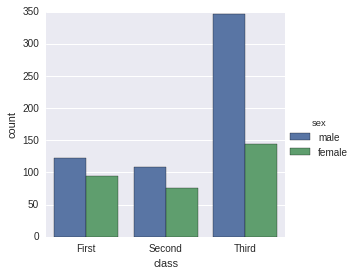

In [80]:
sns.factorplot(x="class", hue="sex", kind="count", data=titanic)

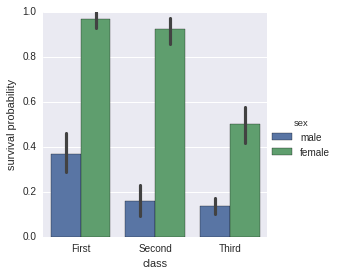

In [82]:
g = sns.factorplot(x="class", y="survived", hue="sex", data=titanic, kind="bar")#  ,size=6 , palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

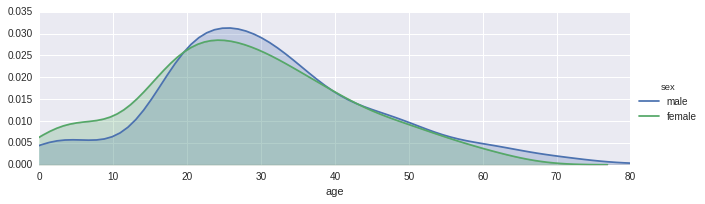

In [88]:
fg = sns.FacetGrid(titanic, hue="sex", aspect=3)
fg.map(sns.kdeplot, "age", shade=True)
fg.add_legend()
fg.set(xlim=(0, 80));

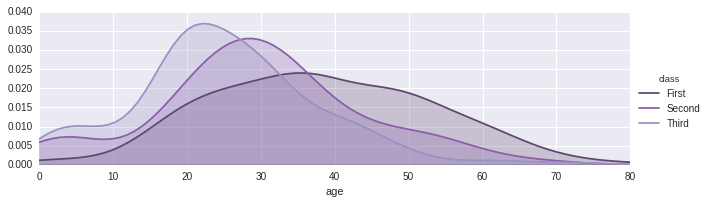

In [87]:
fg = sns.FacetGrid(titanic, hue="class", aspect=3, palette="BuPu_d")
fg.map(sns.kdeplot, "age", shade=True)
fg.set(xlim=(0, 80));
fg.add_legend()

### Klasifikátor 

In [44]:
titanic_drp = titanic[["pclass", "age", "survived"]].dropna(how="any")
X = titanic_drp[["pclass", "age"]]
y = titanic_drp[["survived"]]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

import sklearn.naive_bayes
gnb = sklearn.naive_bayes.GaussianNB()
gnb.fit(X_train, y_train) 
# #KNeighborsClassifier(...)
y_pred = gnb.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0])

[Precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall)

In [40]:
print (sklearn.metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.69      0.88      0.77       137
          1       0.72      0.44      0.55        99

avg / total       0.70      0.69      0.68       236



In [41]:
print (sklearn.metrics.confusion_matrix(y_test, y_pred))

[[120  17]
 [ 55  44]]


## včetně pohlaví

In [45]:
titanic_drp = titanic[["pclass", "age", "psex", "survived"]].dropna(how="any")
X = titanic_drp[["pclass", "age", "psex"]]
y = titanic_drp[["survived"]]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

import sklearn.naive_bayes
gnb = sklearn.naive_bayes.GaussianNB()
gnb.fit(X_train, y_train) 
# #KNeighborsClassifier(...)
y_pred = gnb.predict(X_test)
print (sklearn.metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.77      0.82      0.80       137
          1       0.73      0.66      0.69        99

avg / total       0.75      0.75      0.75       236



## příklad z kamery

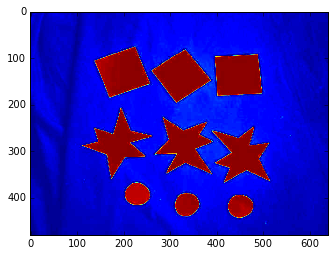

In [5]:
import scipy
import urllib
import cStringIO
import skimage
import skimage.color
import skimage.filter
import skimage.measure
import skimage.io
from sklearn import svm


# URL = "http://uc452cam01-kky.fav.zcu.cz/snapshot.jpg"
URL = "https://raw.githubusercontent.com/mjirik/ZDO/master/objekty/ctverce_hvezdy_kolecka.jpg"
img = skimage.io.imread(URL, as_grey=True)
plt.imshow(img)
# doporučený klasifikátor ...
# pozor na labeling a "+1 problém"





### ukázka řešení 
v notes

# Analýza pohybu

![im](http://www.kky.zcu.cz/uploads/courses/zdo/lesson8/12.jpg)
![im](http://www.kky.zcu.cz/uploads/courses/zdo/lesson8/11.jpg)

rozdílový obraz

![im](http://www.kky.zcu.cz/uploads/courses/zdo/lesson8/9.jpg)

kumulativní obraz

![im](http://www.kky.zcu.cz/uploads/courses/zdo/lesson8/10.jpg)


Klíčové body

![im](http://www.kky.zcu.cz/uploads/courses/zdo/lesson8/8.jpg)




## Tracking

* detekce
* sledování

http://openeuroscience.com/software/computer-vision-and-motion-tracking-software/